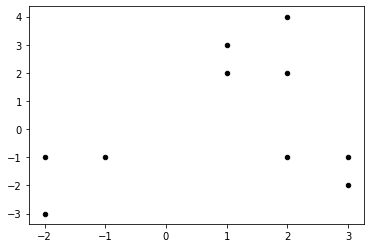

In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from copy import deepcopy
import numpy as np
Data = {'x': [1,1,2,2,-1,-2,-2,2,3,3],
        'y': [3,2,2,4,-1,-1,-3,-1,-1,-2]
       }
f1 = Data['x']
f2 = Data['y']      
df = DataFrame(Data,columns=['x','y'])
plt.scatter(f1, f2, c='black', s=20)

[[ 0.  4.]
 [ 3.  5.]
 [ 0. -3.]]


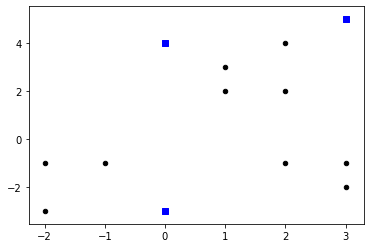

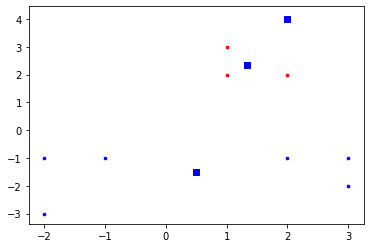

In [2]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


center= {'x': [0,3,0],
        'y': [4,5,-3]
       }
k = 3
cf = np.array(list(zip(center['x'], center['y'])), dtype=np.float32)

#cf=  DataFrame(center,columns=['x','y'])
print(cf)

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=20)
plt.scatter(center['x'], center['y'], c='b',marker='s')   

cfold=np.zeros(cf.shape)
clusters = np.zeros(len(X))
error = dist(cf, cfold, None)

while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], cf)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    cfold = deepcopy(cf)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        cf[i] = np.mean(points, axis=0)
    error = dist(cf, cfold, None)


    colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(cf[:, 0], cf[:, 1], marker='s', s=30, c='b')